In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import xarray as xr
import numpy as np

In [4]:
from pathlib import Path

In [6]:
DEMO = Path('../demo_20210520/2020/202007/20200701/')

In [10]:
min_files = sorted(DEMO.glob('*/*refl_00_65um_min_*'))
max_files = sorted(DEMO.glob('*/*refl_00_65um_max_*'))
mean_files = sorted(DEMO.glob('*/*refl_00_65um_2*'))

In [43]:
mins = []
for f in min_files:
    ds = xr.open_dataset(f)
    mins.append(ds.refl_00_65um_min.sel(latitude=0, longitude=-75, method='nearest').sel(layer=0))
    ds.close()

mins = xr.concat(mins, dim='time')

In [44]:
maxs = []
for f in max_files:
    ds = xr.open_dataset(f)
    maxs.append(ds.refl_00_65um_max.sel(latitude=0, longitude=-75, method='nearest').sel(layer=0))
    ds.close()

maxs = xr.concat(maxs, dim='time')

In [45]:
means = []
for f in mean_files:
    ds = xr.open_dataset(f)
    means.append(ds.refl_00_65um.sel(latitude=0, longitude=-75, method='nearest').sel(layer=0))
    ds.close()

means = xr.concat(means, dim='time')

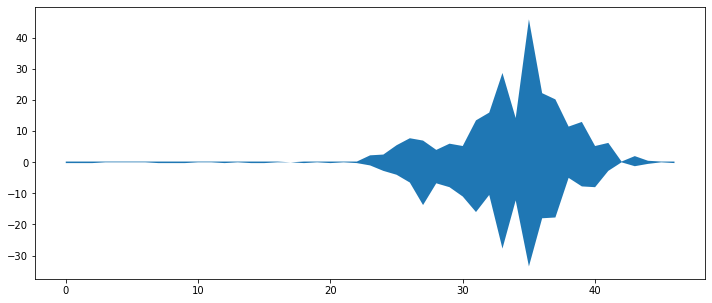

In [47]:
figure(figsize=(12,5))
fill_between(mins.time, mins-means, maxs-means)
#plot(means.time, means, color='k', linestyle='--')